Nama = Almas Rausan Fikri

Batch = 23

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick

style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Soal 1

In [3]:
ct = ['mean', '50%', '25%', '75%', 'mode']
disp = ['std', 'variance', 'min', 'max', 'range', 'IQR']

In [4]:
df1 = df.copy()
soal1 = df1['SalePrice'].describe().to_frame().T
soal1['variance'] = soal1['std'] ** 2
soal1['range'] = soal1['max'] - soal1['min']
soal1['IQR'] = soal1['75%'] - soal1['25%']
soal1['mode'] = df1['SalePrice'].mode().values
soal1[['count'] + ct + disp]

,count,mean,50%,25%,75%,mode,std,variance,min,max,range,IQR
SalePrice,1460.0,180921.19589,163000.0,129975.0,214000.0,140000,79442.502883,6.311111e+09,34900.0,755000.0,720100.0,84025.0


In [5]:
# ukuran pemusatan
soal1[['count'] + ct]

,count,mean,50%,25%,75%,mode
SalePrice,1460.0,180921.19589,163000.0,129975.0,214000.0,140000


In [6]:
# ukuran penyebaran
soal1[['count'] + disp]

,count,std,variance,min,max,range,IQR
SalePrice,1460.0,79442.502883,6.311111e+09,34900.0,755000.0,720100.0,84025.0


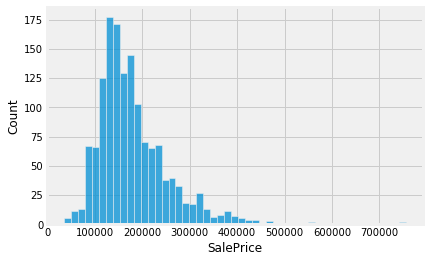

In [7]:
sns.histplot(df1['SalePrice'])

1. Data positively skewed (analisis lebih baik pakai median / percentile)
2. 75% dari rumah yang dijual harganya sama atau kurang dari 214000
3. Perbedaan harga rumah termahal dan termurah adalah sebesar 720100
4. Harga rumah termurah 34900 termahal 755000
5. Rata-rata harga rumah sebesar 180921.20, tetapi 50% dari rumah yang dijual harganya sama atau kurang dari 163000

# Soal 2

In [8]:
df2 = df.copy()
df2group = df2.groupby('YrSold')['SalePrice']
soal2 = df2group.describe().reset_index()
soal2['variance'] = soal2['std'] ** 2
soal2['range'] = soal2['max'] - soal2['min']
soal2['IQR'] = soal2['75%'] - soal2['25%']
soal2['mode'] = df2group.agg(pd.Series.mode).values
soal2[['YrSold','count'] + ct + disp]

,YrSold,count,mean,50%,25%,75%,mode,std,variance,min,max,range,IQR
0,2006,314.0,182549.458599,163995.0,131375.0,218782.5,140000,79426.838855,6.308623e+09,35311.0,625000.0,589689.0,87407.5
1,2007,329.0,186063.151976,167000.0,129900.0,219500.0,"[129000, 144000]",85768.171410,7.356179e+09,39300.0,755000.0,715700.0,89600.0
2,2008,304.0,177360.838816,164000.0,131250.0,207000.0,140000,69735.610685,4.863055e+09,40000.0,446261.0,406261.0,75750.0
3,2009,338.0,179432.103550,162000.0,125250.0,212750.0,110000,80879.237311,6.541451e+09,34900.0,582933.0,548033.0,87500.0
4,2010,175.0,177393.674286,155000.0,128100.0,213250.0,"[128000, 140000, 143000, 155000, 190000]",80451.280085,6.472408e+09,55000.0,611657.0,556657.0,85150.0


In [9]:
# Ukuran pemusatan
soal2[['YrSold','count'] + ct]

,YrSold,count,mean,50%,25%,75%,mode
0,2006,314.0,182549.458599,163995.0,131375.0,218782.5,140000
1,2007,329.0,186063.151976,167000.0,129900.0,219500.0,"[129000, 144000]"
2,2008,304.0,177360.838816,164000.0,131250.0,207000.0,140000
3,2009,338.0,179432.103550,162000.0,125250.0,212750.0,110000
4,2010,175.0,177393.674286,155000.0,128100.0,213250.0,"[128000, 140000, 143000, 155000, 190000]"


In [10]:
# Ukuran penyebaran
soal2[['YrSold','count'] + disp]

,YrSold,count,std,variance,min,max,range,IQR
0,2006,314.0,79426.838855,6.308623e+09,35311.0,625000.0,589689.0,87407.5
1,2007,329.0,85768.171410,7.356179e+09,39300.0,755000.0,715700.0,89600.0
2,2008,304.0,69735.610685,4.863055e+09,40000.0,446261.0,406261.0,75750.0
3,2009,338.0,80879.237311,6.541451e+09,34900.0,582933.0,548033.0,87500.0
4,2010,175.0,80451.280085,6.472408e+09,55000.0,611657.0,556657.0,85150.0


Secara deskriptif jelaskan apakah ada perbedaan setiap tahunnya atau tidak?

Dari ukuran pemusatan:
* Rata-rata dan nilai tengah harga rumah tiap tahun berbeda. Paling tinggi di tahun 2007
* Tahun 2008 - 2010 harga rumah cenderung menurun karena ada SubPrime crisis

Dari dispersi:
* Tahun 2006 - 2007 meningkat sebarannya, sedangkan tahun 2008 tiba-tiba menjadi sempit
* Harga rumah paling mahal di tahun 2008 paling rendah di antara tahun lainnya

# Soal 3

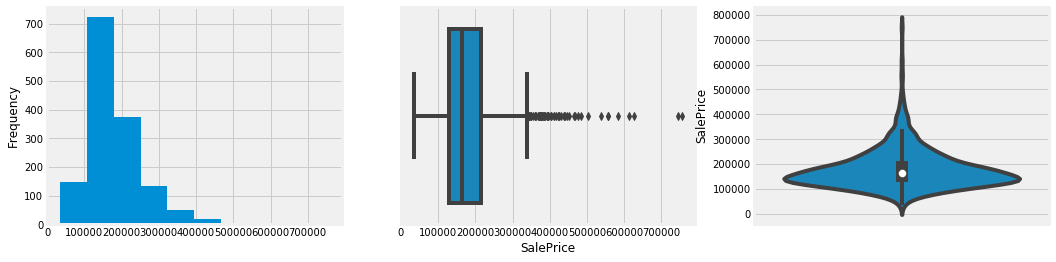

In [11]:
df3 = df.copy()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

g1 = df['SalePrice'].plot(kind='hist', ax = axes[0])
g2 = sns.boxplot(data = df, x = 'SalePrice', ax = axes[1])
g3 = sns.violinplot(data = df, y = 'SalePrice', ax = axes[2])

Problem: analisa menggunakan mean / median?

Analisa statistik:
- Grafik positively skewed (mean > median), terlihat juga dari ketiga grafik
- Dari boxplot terlihat adanya outlier

Intrepretasi bisnis: "Hai tim bisnis, gini lho, jadi ini kan kita punya grafik yang beberapa datanya nilainya jauh banget dari rata-rata /  titik tengah. Nah nilai yang jauh ini namanya outlier. Ketika suatu data ada yang nilainya ekstrim gini, otomatis rata-rata terpengaruh dong, ketarik ke arah si outlier itu. Nah dalam kasus gini nih, akan lebih baik kalau kita pakai median sebagai penentu titik tengahnya, dimana median lebih tahan kalau ada data ekstrim seperti ini"

# Soal 4

Claim: Harga rumah pasti naik tiap tahunnya.

Hipotesis:
* Harga rumah berbeda tiap tahunnya
* Harga rumah t(i+1) > harga rumah t(i)

Alat uji yang digunakan:
* ANOVA (H0: harga rumah tidak berbeda tiap tahun)
* T-test (H0: harga rumah t(i+1) = harga rumah t(i) )

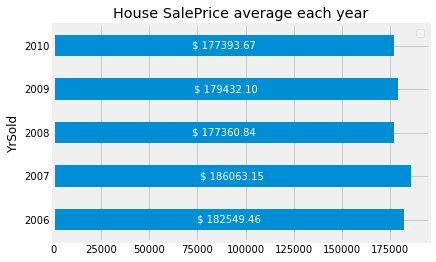

In [12]:
g = df.groupby('YrSold').agg({'SalePrice': 'mean'}).plot(kind = 'barh')
g.legend("")
g.set_title("House SalePrice average each year")

for p in g.patches:
    g.annotate(f'$ {p.get_width():.2f}',
               xy = (p.get_x() + p.get_width() / 2,
                     p.get_y() + p.get_height() / 2,),
               ha = 'center',
               va = 'center',
               color = 'white'
              )

In [13]:
import scipy.stats as st

In [14]:
df4 = df.copy()

# Langkah 1
# H0 : Rata-rata SalePrice sama untuk semua tahun
# H1 : Rata-rata SalePrice berbeda untuk beberapa tahun

# Langkah 2
df_2006 = df4[df4['YrSold'] == 2006]
df_2007 = df4[df4['YrSold'] == 2007]
df_2008 = df4[df4['YrSold'] == 2008]
df_2009 = df4[df4['YrSold'] == 2009]
df_2010 = df4[df4['YrSold'] == 2010]

In [15]:
anova = st.f_oneway(df_2006['SalePrice'], df_2007['SalePrice'], df_2008['SalePrice'], df_2009['SalePrice'], df_2010['SalePrice'])

In [16]:
pvalue = anova.pvalue
print(pvalue)
if pvalue >= 0.05:
    print('Insufficient Reject H0')
else:
    print('Sufficient Reject H0')

0.6300887663573457
Insufficient Reject H0


Dari pengujian pertama kita langsung mengetahui bahwa tidak ada bukti yang kuat untuk menolak H0. Artinya, tidak ada perbedaan yang signifikan dari rata-rata SalePrice (harga rumah) untuk semua tahun. Tidak naik dan tidak turun secara signifikan.

# Soal 5

Kasus yang akan digunakan adalah membuka akun deposit untuk nasabah bank. Pada kesempatan kali ini data scientist diminta tolong untuk menganalisa hasil ab-testing suatu perusahaan bank. Apakah jumlah campaign mampu meningkatkan keinginan user untuk membuka akun deposit atau tidak?

1. Untuk variabel jumlah campaign bisa dicek untuk kolom campaign
2. untuk variabel apakah akhirnya user membuka akun atau tidak bisa menggunakan variabel y

In [17]:
s5 = pd.read_csv('bank-full.csv', sep = ';')

In [18]:
s5.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


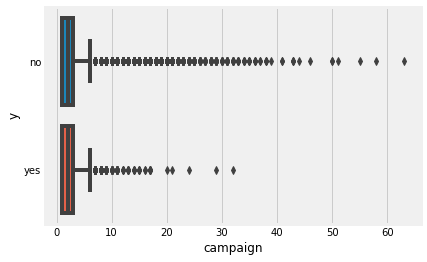

In [19]:
sns.boxplot(data = s5, x = 'campaign', y = 'y')

In [20]:
s5['y_bool'] = s5['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [21]:
s5x = s5.groupby('campaign').agg({'y_bool': ['sum', 'count']}).reset_index()
s5x.columns = ['campaign', 'yes', 'total']
s5x['cr'] = s5x['yes'] / s5x['total']

Text(0, 0.5, 'conversion rate')

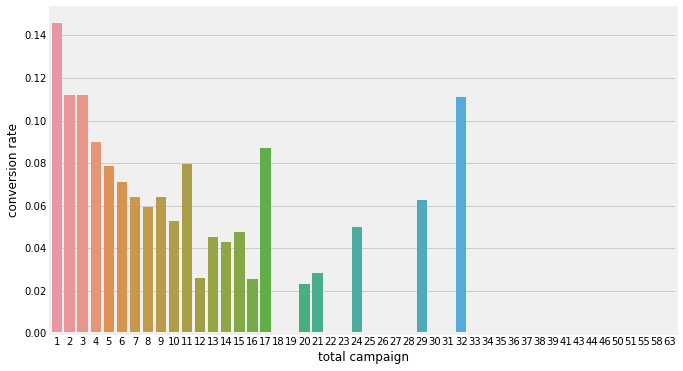

In [22]:
fig = plt.figure(figsize = (10,6))
g = sns.barplot(data = s5x, x = 'campaign', y = 'cr')
g.set_xlabel('total campaign')
g.set_ylabel('conversion rate')

In [23]:
# Filter durasi 1 tahun, supaya eksperimen tidak terlalu lama-lama
df_f = s5[s5['duration'] <= 365]
df_f['campaign'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
campaign,36076.0,2.843303,3.264871,1.0,1.0,2.0,3.0,63.0


In [24]:
df_single = df_f[df_f['campaign'] == 1]
df_multiple = df_f[df_f['campaign'] > 1]
print(df_single.shape)
print(df_multiple.shape)

(13980, 18)
(22096, 18)


**Pemahaman konsep A/B Testing**

* *Apa nama experimentnya?* 
    * "AB Test: Pengaruh Single Campaign (A) vs Multiple Campaign (B) Terhadap Keinginan Membuka Rekening Deposit Baru"
* *Definisikan Hipotesis?* 
    * Single campaign lebih menarik keinginan user untuk membuka akun deposit
* *Siapa participant-nya?* 
    * Nasabah bank yang belum membuka akun deposit
* *Variabel yang akan diuji apa?* 
    * Frekuensi campaign?
* *Metrics apa yang akan digunakan?* 
    * Conversion rate single vs multiple campaign
    * Conversion rate = rasio konsumen yang akhirnya buka akun dibandingkan jumlah awal
* *Berapa sample size dan durasi experiment?* 
    * 10000 nasabah, 1 year

In [25]:
df_single_sampled = df_single.sample(n=10000, random_state = 42)
df_mult_sampled = df_multiple.sample(n=10000, random_state = 42)

In [26]:
df_single_sampled.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_bool
44684,22,student,single,secondary,no,249,no,no,unknown,5,sep,11,1,-1,0,unknown,no,0
41197,73,retired,married,unknown,no,519,no,no,telephone,20,aug,91,1,-1,0,unknown,no,0
24761,42,entrepreneur,married,tertiary,no,2249,yes,no,telephone,18,nov,228,1,125,5,failure,no,0
8785,27,management,single,tertiary,no,648,yes,yes,unknown,4,jun,174,1,-1,0,unknown,no,0
10556,59,blue-collar,married,secondary,no,969,no,no,unknown,16,jun,270,1,-1,0,unknown,no,0


**Pengujian Hipotesis**

* *Penentuan hipotesis*
    * H0: single campaign and multiple campaign have same conversion rate
    * H1: single campaign and multiple campaign do not have same conversion rate
* *Pengujian yang digunakan*
    * proportions_ztest
* *Deteksi asumsi beserta cara penanganannya*
    * proportion z-test assumption:
        * "Sample size is large enough for z to be approximately normally distributed" -> each 10000 sample
        * "Group 1 sample is a simple random sample (SRS) from population 1, group 2 sample is an independent SRS from population 2. That is, within and between groups, observations are independent of one another" -> yes, filtered that already. Group 1 campaign = 1, group 2 campaign > 1. Then sampled randomly between each group.
* *Hasil pengujian hipotesis*
    * Below
* *Kesimpulan dan interpretasi*
    * Below

In [27]:
n_success_control = df_single_sampled['y_bool'].sum()
n_success_treatment = df_mult_sampled['y_bool'].sum()

n_obs_control = df_single_sampled['y_bool'].count()
n_obs_treatment = df_mult_sampled['y_bool'].count()
print(n_success_control)
print(n_success_treatment)

911
434


In [28]:
control_conversion_rate = n_success_control/n_obs_control
treatment_conversion_rate = n_success_treatment/n_obs_treatment
print('Conversion Rate from Control : {0:0.4f}'.format(control_conversion_rate))
print('Conversion Rate from Treatment : {0:0.4f}'.format(treatment_conversion_rate))

Conversion Rate from Control : 0.0911
Conversion Rate from Treatment : 0.0434


(0, 0.1)

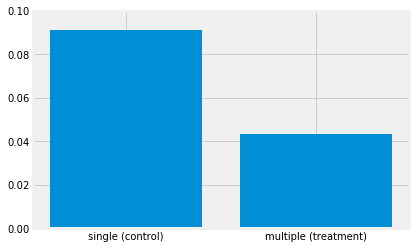

In [29]:
x = ['single (control)','multiple (treatment)']
value = [control_conversion_rate,treatment_conversion_rate]
plt.bar(x,value)

plt.ylim(0,0.10)

Okay, so, based on the chart conversion rate of single campaign is higher than multiple campaign.

Is the difference significant? We will do the hypothesis testing using proportions ztest

**Hypothesis Testing**

In [30]:
import statsmodels.stats.proportion as sp

C:\Users\Asif\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [31]:
## making array
success = np.array([n_success_control,n_success_treatment])
obs = np.array([n_obs_control,n_obs_treatment])

stats,pvalue = sp.proportions_ztest(success,obs)

print('P-Value : {0:0.4f}'.format(pvalue))
if pvalue >= 0.05:
    print('Insufficient to reject H0')
else :
    print('Sufficient to reject H0')

P-Value : 0.0000
Sufficient to reject H0


**Kesimpulan dan interpretasi**

Oke, jadi setelah dilakukan uji hipotesis, terlihat bahwa nilai P value di bawah 0.05, artinya terdapat cukup bukti untuk menolak H0.

Artinya terdapat perbedaan yang signifikan dari variabel kontrol dan variabel treatment. Dari grafik terlihat bahwa conversion rate single campaign lebih besar dibandingkan conversion rate multiple campaign. Artinya, single campaign lebih baik untuk mengajak user yang belum menggunakan deposit untuk menggunakan deposit dibandingkan multiple campaign.